0.5166666666666667


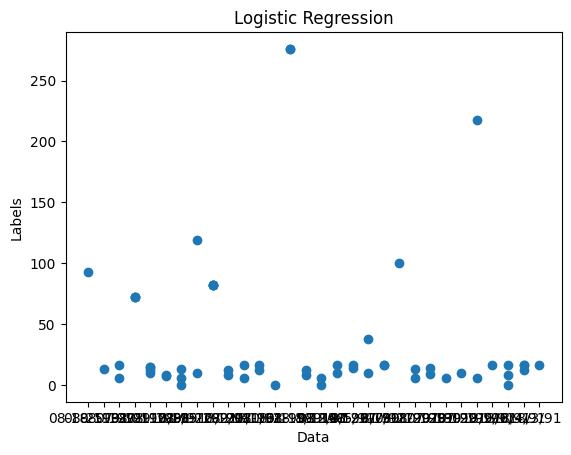

In [77]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Read the CSV file
df = pd.read_csv('data.csv')
df.columns = ['Data', 'Time', 'Value', 'Labels']
df.head()


label = pd.DataFrame(encoder.fit_transform(df[['Labels']]).toarray(), columns=encoder.get_feature_names_out(['Labels']))

# Ngram-based representation for 'Data'
vector = CountVectorizer(ngram_range=(2, 32))
X = vector.fit_transform(df['Data'])

# Combine one-hot encoded labels and ngram-based features
x = pd.concat([label, pd.DataFrame(X.toarray(), columns=vector.get_feature_names_out())], axis=1)

# Target variable
Y = df['Labels']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
var = LogisticRegression()
var.fit(X_train, Y_train)

# Evaluate the model
accuracy = var.score(X_test, Y_test)
print(accuracy)

plt.scatter(y_test, var.predict(X_test))
plt.xlabel('Data')
plt.ylabel('Labels')
plt.title('Logistic Regression')
plt.show()
